## Tercer Parcial 
### Estadística Aplicada

Cinthia Zaydé Gabrielle García Belmonte

Gpo 44 - 2076329

In [192]:
# Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
#pdarima
import pmdarima as pm

In [194]:
## Datos
datos_metrorrey = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

## 1. Limpieza de Datos

In [195]:
datos_metrorrey.head(3)

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0


In [196]:
# tipo de variables
datos_metrorrey.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

La variable mes esta guardada como string, hay que cambiarla a tipo fecha

In [197]:
datos_metrorrey['mes'] = pd.to_datetime(datos_metrorrey['mes'], format='%Y/%m')

In [198]:
# tipo de variables
datos_metrorrey.dtypes

mes                          datetime64[ns]
miles de pasajeros                  float64
ingresos (miles de pesos)           float64
dtype: object

In [199]:
# missing values
datos_metrorrey.isna().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

No hay missing values y las variables son del tipo correcto

In [200]:
## Asignar mes como index y dar frecuencia
datos_metrorrey = datos_metrorrey.set_index('mes')
datos_metrorrey = datos_metrorrey.asfreq('MS')

## 2. Análisis exploratorio

In [201]:
print('El rango de fechas de la base de datos va desde', datos_metrorrey.index.min().date(), 'hasta', datos_metrorrey.index.max().date())

El rango de fechas de la base de datos va desde 1995-01-01 hasta 2023-08-01


In [202]:
print('Son', datos_metrorrey.count()[0], 'observaciones')

Son 344 observaciones


In [203]:
print('El valor mínimo de pasajeros es de', datos_metrorrey['miles de pasajeros'].min(), '(en miles) pasajeros, mientras que el máximo es de', datos_metrorrey['miles de pasajeros'].max(), '(en miles) pasajeros')

El valor mínimo de pasajeros es de 2397.0 (en miles) pasajeros, mientras que el máximo es de 17534.523 (en miles) pasajeros


## 3. Gráficas

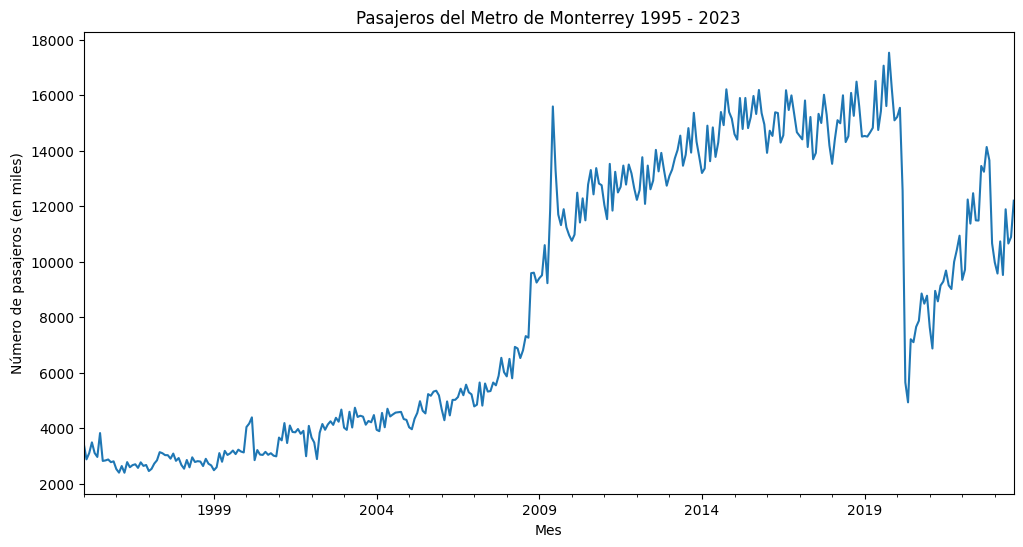

In [204]:
datos_metrorrey['miles de pasajeros'].plot(figsize=(12,6))
plt.title('Pasajeros del Metro de Monterrey 1995 - 2023')
plt.xlabel('Mes')
plt.ylabel('Número de pasajeros (en miles)');

In [205]:
## calcular media móvil centrada
datos_metrorrey['MMC-7'] = datos_metrorrey['miles de pasajeros'].rolling(7, center=True).mean()

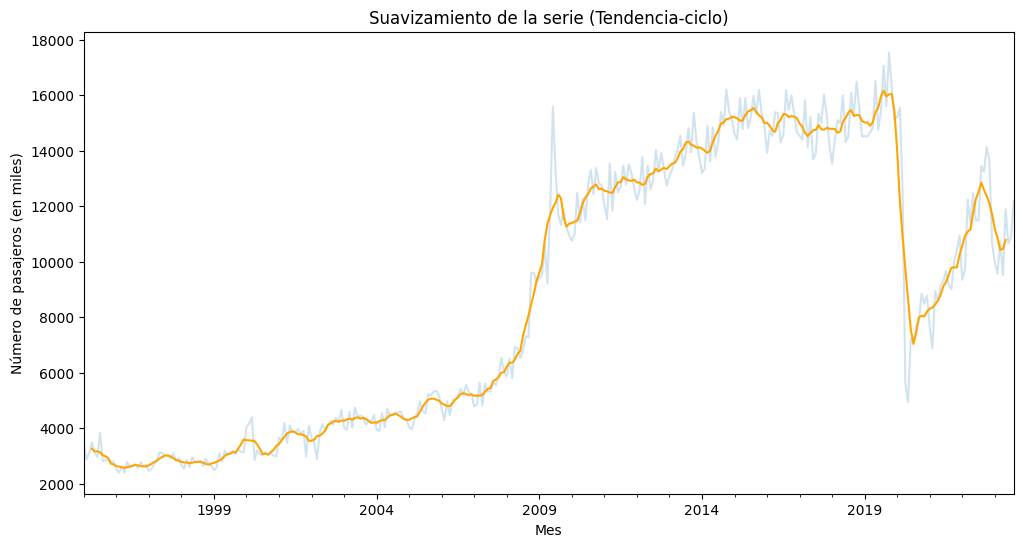

In [206]:
## Graficar
datos_metrorrey['miles de pasajeros'].plot(alpha=0.2,figsize=(12,6))
datos_metrorrey['MMC-7'].plot(color='orange')
plt.title('Suavizamiento de la serie (Tendencia-ciclo)')
plt.xlabel('Mes')
plt.ylabel('Número de pasajeros (en miles)');

Podemos ver 2 ciclos claros
El primero ocurre a inicios de 2009, cuando la grafica sube de golpe, el aumento de pasajeros en el metro en ese periodo de puede deber a que entre 2008 y 2009 se inauguro la ampliación de la línea 2 de Metrorrey
El segundo ciclo ocurre en 2020, la gráfica cae de golpe, la disminuco¿ión de pasajeros en el metro en 2020 se debe al inicio de la pandemia por covid-19

La gráfica no muestra una tendencia tan clara pero pareciera tener una ligera tendencia ascendente.

## 4. Componente estacional

In [207]:
ets = seasonal_decompose(datos_metrorrey['miles de pasajeros'], model = 'mult')

In [208]:
ets

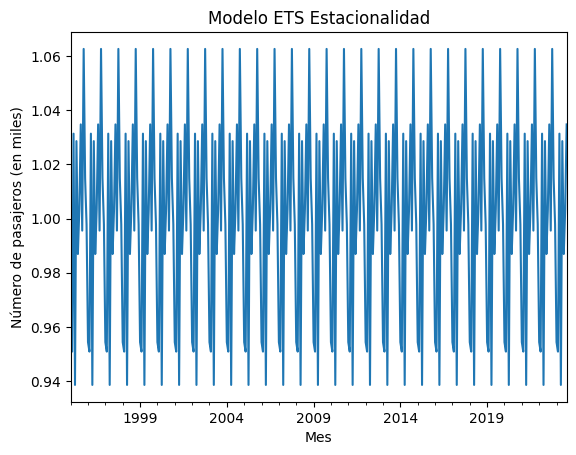

In [209]:
ets.seasonal.plot()
plt.title('Modelo ETS Estacionalidad')
plt.xlabel('Mes')
plt.ylabel('Número de pasajeros (en miles)');

In [210]:
print('El mes con menor tráfico de pasajeros y por lo tanto el mejor para realizar el mantenimiento del metro es el número', ets.seasonal.head(12).idxmin().date().month)

El mes con menor tráfico de pasajeros y por lo tanto el mejor para realizar el mantenimiento del metro es el número 4


Abril es el mejor mes para realizar el mantenimiento

## 5. Ingresos por pasaje

In [211]:
datos_metrorrey['holtwinters'] = ExponentialSmoothing(datos_metrorrey['miles de pasajeros'],trend= 'add', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)

C:\Users\zayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


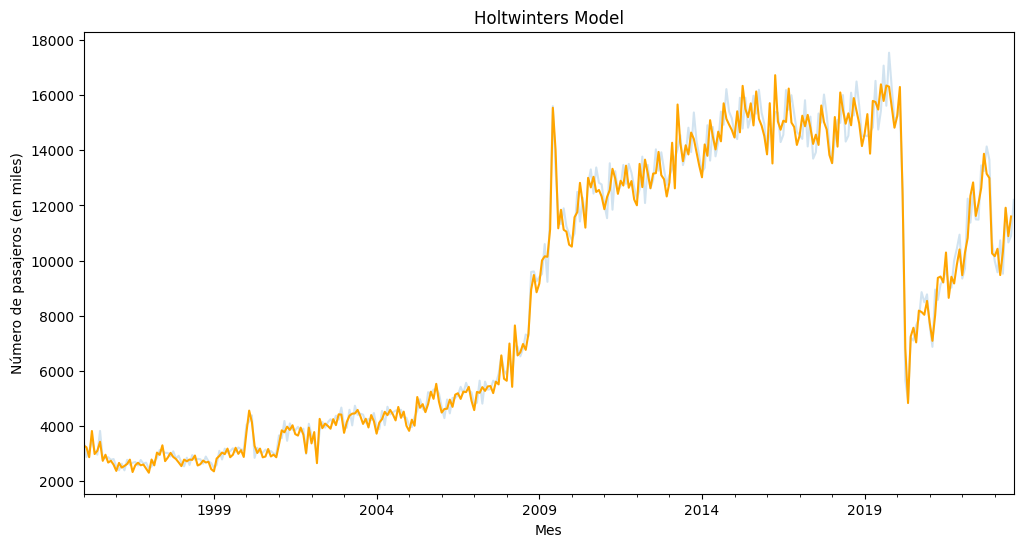

In [212]:
datos_metrorrey['miles de pasajeros'].plot(alpha=0.2,figsize=(12,6))
datos_metrorrey['holtwinters'].plot(color='orange')
plt.title('Holtwinters Model')
plt.xlabel('Mes')
plt.ylabel('Número de pasajeros (en miles)');

In [213]:
# Guardar modelo
holtwinters_models = ExponentialSmoothing(datos_metrorrey['miles de pasajeros'],trend= 'add', seasonal='mul', seasonal_periods=12).fit()
# Pronostico a 5 meses
pronostico_yh = holtwinters_models.forecast(5)    

C:\Users\zayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [214]:
# Pronostico de pasajeros (5 meses)
pronostico_yh

2023-09-01    11441.185911
2023-10-01    11998.364287
2023-11-01    11200.851863
2023-12-01    10433.610889
2024-01-01     9967.179612
Freq: MS, dtype: float64

In [215]:
# Pronostico de ingresos (5 meses)
pronostico_yh*7.1

2023-09-01    81232.419972
2023-10-01    85188.386439
2023-11-01    79526.048227
2023-12-01    74078.637313
2024-01-01    70766.975244
Freq: MS, dtype: float64

## 6. Pronostico ARIMA

a) prueba de raíz unitaria

In [216]:
## Prueba de raiz unitaria 
prueba_adf = adfuller(datos_metrorrey['miles de pasajeros'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.58

No rechazamos $H_0$, significa que lo miles de pasajeros del metro es una serie no estacionaria

b) Primeras differencias

In [218]:
## Primeras diferencias
datos_metrorrey['miles de pasajeros diff'] = datos_metrorrey['miles de pasajeros'].diff()

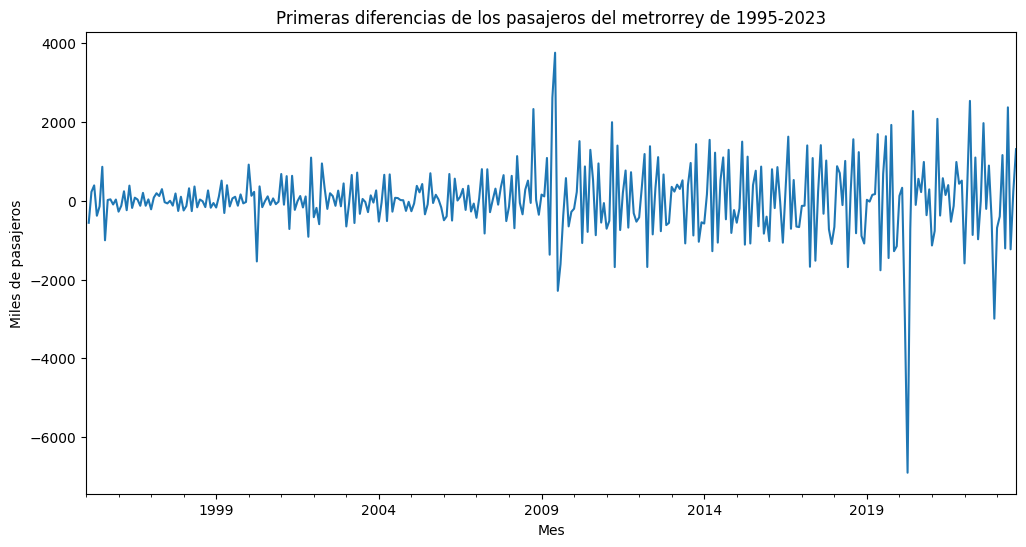

In [219]:
datos_metrorrey['miles de pasajeros diff'].plot(figsize=(12,6))
plt.title('Primeras diferencias de los pasajeros del metrorrey de 1995-2023')
plt.xlabel('Mes')
plt.ylabel('Miles de pasajeros');

In [220]:
## Prueba de raiz unitaria 
prueba_adf1 = adfuller(datos_metrorrey['miles de pasajeros diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos $H_0$ eso significa que las primeras diferencias de los pasajeros del metro es un proceso estacionario

* pasajeros del metro I(1) 
* primeras diferencias pasajeros del metro I(0)

d) graficas correlacion

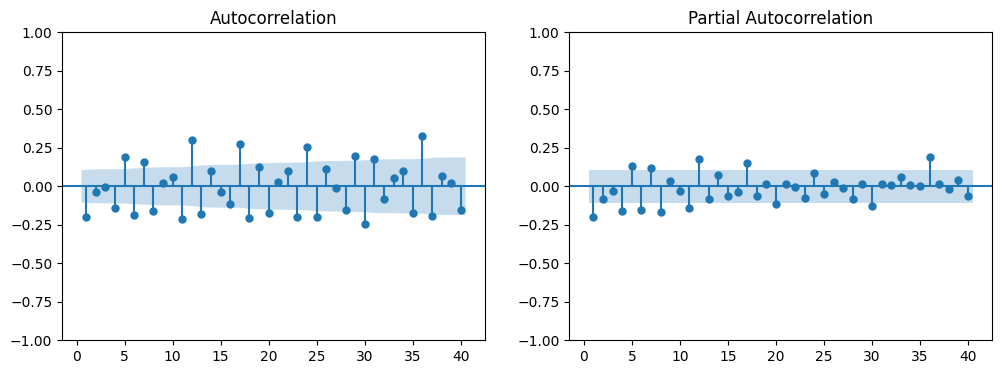

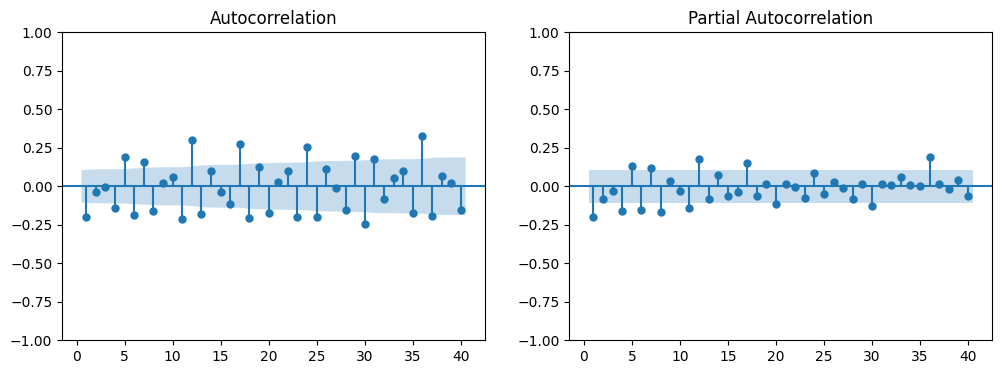

In [221]:
## graficas de correlación
ig, ax = plt.subplots(1,2,figsize= (12,4))
## 1er subgrafica
plot_acf(datos_metrorrey['miles de pasajeros diff'].dropna(), zero=False, lags=40, ax=ax[0])
plot_pacf(datos_metrorrey['miles de pasajeros diff'].dropna(), zero=False, lags=40, ax=ax[1])

Las gráficas de correlación muestran un patron regular, por lo tanto significa que estamos ante una serie con componente estacional

e) Autoarima

In [222]:
# identificar el orden del arima
#AIC
pm.auto_arima(datos_metrorrey['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              m=12,
              seasonal=True,
              information_criterion='aic',
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [226]:
# identificar el orden del arima
#BIC
pm.auto_arima(datos_metrorrey['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              m=12,
              seasonal=True,
              ic='bic',
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [224]:
# identificar el orden del arima
#hqic
pm.auto_arima(datos_metrorrey['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              m=12,
              seasonal=True,
              ic='hqic',
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [225]:
# identificar el orden del arima
#oob
pm.auto_arima(datos_metrorrey['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              m=12,
              seasonal=True,
              ic='oob',
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

Segun el modelo BIC

El numero de pasajeros del metrorrey es un SARIMA(0,1,2)(1,0,1)[12] 

f) Modelo arima

In [227]:
model = ARIMA(datos_metrorrey['miles de pasajeros'],
              order=(0,1,2),
              seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -2774.759
Date:                            Sat, 04 Nov 2023   AIC                           5559.518
Time:                                    14:09:45   BIC                           5578.706
Sample:                                01-01-1995   HQIC                          5567.161
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0474      0.031     -1.553      0.120      -0.107       0.012
ma.L2         -0.1823      0.037     -4.909      0.000      -0.255      -0.110
ar.S.L12       0.9738      0.022     45.200      0.000       0.932       1.016
ma.S.L12      -0.8388      0.051    -16.346      0.000      -0.939      -0.738
sigma2      6.036e+05   2.54e+04     23.731      0.000    5.54e+05    6.53e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4713.87
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.41   Skew:                            -1.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

g) Pronostico a 5 meses (gráfica)

In [232]:
inicio = '2023-09-01'
fin = '2024-01-01'

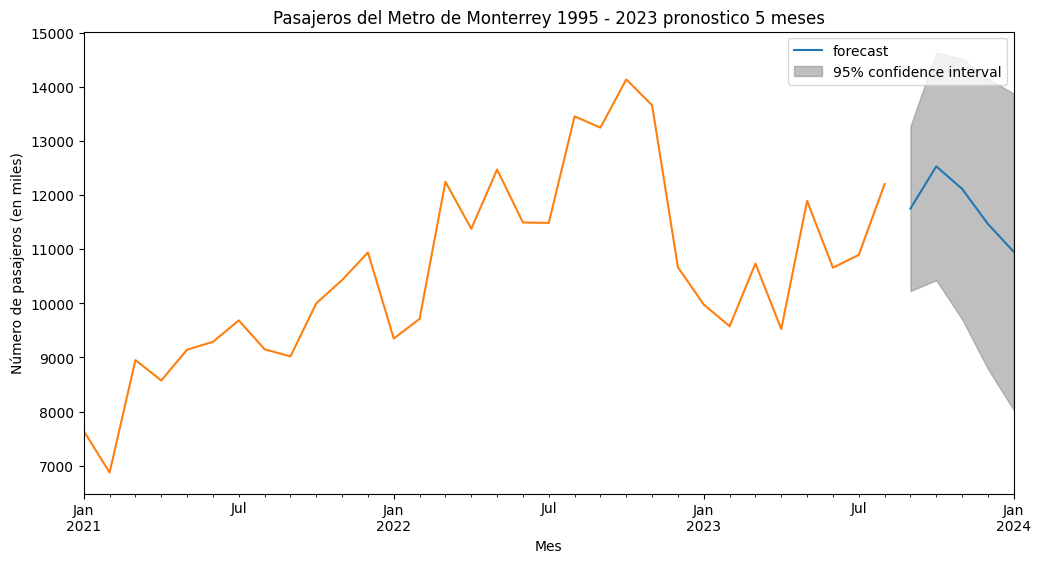

In [233]:
plot_predict(results,inicio,fin)
datos_metrorrey_2021 = datos_metrorrey[datos_metrorrey.index >= '2021/01/01']
datos_metrorrey_2021['miles de pasajeros'].plot(figsize=(12,6))
plt.title('Pasajeros del Metro de Monterrey 1995 - 2023 pronostico 5 meses')
plt.xlabel('Mes')
plt.ylabel('Número de pasajeros (en miles)');

h ) pronostico a 5 meses

In [234]:
forecast = results.get_forecast(steps=6)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [235]:
# juntarlos en un dataframe
df_forecast = pd.DataFrame({
    'pronostico':pronostico_valor,
    'limite inferior': pronostico_intervalos.iloc[:,0],
    'limite superior': pronostico_intervalos.iloc[:,1]
})
df_forecast

,pronostico,limite inferior,limite superior
2023-09-01,11750.064012,10227.332651,13272.795372
2023-10-01,12529.086929,10426.060737,14632.113121
2023-11-01,12113.625109,9705.641632,14521.608587
2023-12-01,11465.163054,8786.721431,14143.604677
2024-01-01,10951.882543,8027.893253,13875.871833


i) Ingresos a 5 meses

In [236]:
df_forecast_ingresos = df_forecast * 7.1
df_forecast_ingresos

,pronostico,limite inferior,limite superior
2023-09-01,83425.454482,72614.061824,94236.847139
2023-10-01,88956.517195,74025.031230,103888.003161
2023-11-01,86006.738274,68910.055584,103103.420965
2023-12-01,81402.657683,62385.722157,100419.593208
2024-01-01,77758.366058,56998.042100,98518.690016
